In [3]:
from data import WiderFaceDetection, preproc, detection_collate
import os
import torch
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
training_dataset = "./data/widerface/train/label.txt"
img_dim = 640
rgb_mean = (104, 117, 123) # bgr order
dataset = WiderFaceDetection(training_dataset,preproc(img_dim, rgb_mean))
print(dataset)

In [3]:
print(len(dataset[0][0][0]))
print(dataset[0][0][0].shape)


640
torch.Size([640, 640])


In [4]:
print(len(dataset[0][0][0][0]))
print(dataset[0][0][0][0].shape)

640
torch.Size([640])


In [5]:
print(len(dataset[0][0]))
print(dataset[0][0].shape)

3
torch.Size([3, 640, 640])


In [6]:
len(dataset[0])

2

In [7]:
len(dataset)

12880

In [8]:
# 데이터셋 및 DataLoader 생성
batch_size = 32
num_workers = 4
dataset = WiderFaceDetection(training_dataset, preproc(img_dim, rgb_mean))
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, collate_fn=detection_collate)

# 첫 번째 배치 데이터 확인
images, targets = next(iter(data_loader))
print(f"Images Shape: {images.shape}")
print(f"Targets Shape: {len(targets)}")  # Targets는 리스트 형태일 가능성이 높음


Images Shape: torch.Size([32, 3, 640, 640])
Targets Shape: 32


In [13]:
# 첫 번째 배치의 첫 번째 이미지 & 타겟 데이터 가져오기
image = images[1].cpu().numpy()  # (C, H, W) → (H, W, C)
target = targets[1]  # 첫 번째 이미지의 타겟 정보
# Bounding Box 및 랜드마크를 이미지에 표시하는 함수
def draw_targets(image, target):
    image = (image * 255).astype(np.uint8)  # 정규화된 이미지를 0-255 픽셀 범위로 변환
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # OpenCV는 BGR을 사용하므로 변환

    # Bounding Box 그리기
    for t in target:
        x_min, y_min, x_max, y_max = int(t[0] * image.shape[1]), int(t[1] * image.shape[0]), \
                                     int(t[2] * image.shape[1]), int(t[3] * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)  # 초록색 박스

        # 랜드마크 좌표 (얼굴 특징점) 그리기 (x, y 좌표 5쌍)
        for i in range(4, 14, 2):  # 4번째부터 14번째까지 (5개 랜드마크)
            x, y = int(t[i] * image.shape[1]), int(t[i + 1] * image.shape[0])
            cv2.circle(image, (x, y), 2, (0, 0, 255), -1)  # 빨간색 점

    return image

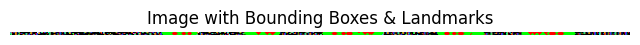

In [14]:
image_with_targets = draw_targets(image, target)

# Matplotlib으로 이미지 출력
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image_with_targets, cv2.COLOR_BGR2RGB))  # 다시 RGB로 변환하여 출력
plt.axis("off")
plt.title("Image with Bounding Boxes & Landmarks")
plt.show()

In [15]:
print(torch.__version__)

2.5.1


In [41]:
img_path = "/home/youngoh/retinaface/Pytorch_Retinaface/data/widerface/train/images/0--Parade/0_Parade_marchingband_1_849.jpg"
img = cv2.imread(img_path)
height, width, _ = img.shape

# 디버깅을 쉽게 하기 위한 코드 (for문을 쓰지 않고 하나씩 np.array로 만들어서 처리)
labels = "449 330 122 149 488.906 373.643 0.0 542.089 376.442 0.0 515.031 412.83 0.0 485.174 425.893 0.0 538.357 431.491 0.0 0.82"
label = labels.split(' ')
print(f"label: {label}")
annotations = np.zeros((0, 15))

print(f"annotations: {annotations}")
annotation = np.zeros((1, 15))
# bbox
annotation[0, 0] = label[0]  # x1
print(f"annotations0: {annotation}")
annotation[0, 1] = label[1]  # y1
print(f"annotation1: {annotation}")
annotation[0, 2] = label[0] + label[2]  # x2
print(f"annotation2: {annotation}")
annotation[0, 3] = label[1] + label[3]  # y2
print(f"annotation3: {annotation}")
# landmarks
annotation[0, 4] = label[4]    # l0_x
print(f"annotations 4: {annotation}")
annotation[0, 5] = label[5]    # l0_y
print(f"annotations: {annotation}")
annotation[0, 6] = label[7]    # l1_x
print(f"annotations: {annotation}")
annotation[0, 7] = label[8]    # l1_y
print(f"annotations: {annotation}")
annotation[0, 8] = label[10]   # l2_x
print(f"annotations: {annotation}")
annotation[0, 9] = label[11]   # l2_y
print(f"annotations: {annotation}")
annotation[0, 10] = label[13]  # l3_x
print(f"annotations: {annotation}")
annotation[0, 11] = label[14]  # l3_y
print(f"annotations: {annotation}")
annotation[0, 12] = label[16]  # l4_x
print(f"annotations: {annotation}")
annotation[0, 13] = label[17]  # l4_y
print(f"annotations: {annotation}")
print("-----------------")
print(f"annotation shape: {annotation.shape}")
print("-----------------")
if (annotation[0, 4]<0):
    annotation[0, 14] = -1
else:
    annotation[0, 14] = 1

annotations = np.append(annotations, annotation, axis=0)
print(f"annotations: {annotations}")
print("-----------------")
print(f"annotations shape: {annotations.shape}")
print("-----------------")
target = np.array(annotations)
print(f"target = {target}")
print("-----------------")
print(f"target shape = {target.shape}")
print("-----------------")


print(img, target)
img_dim = 640
rgb_means = (104, 117, 123)

boxes = target[:, :4].copy()
labels = target[:, -1].copy()
landm = target[:, 4:-1].copy()
print(f'boxes={boxes}, labels={labels}, landm={landm}')
print(f"boxes shape={boxes.shape}, labels shape={labels.shape}, landm shape={landm.shape}") 

print("-----------------")
# image_t, boxes_t, labels_t, landm_t, pad_image_flag = _crop(image, boxes, labels, landm, img_dim)





# image_t = _distort(image_t)
# image_t = _pad_to_square(image_t, rgb_means, pad_image_flag)
# image_t, boxes_t, landm_t = _mirror(image_t, boxes_t, landm_t)
# height, width, _ = image_t.shape
# image_t = _resize_subtract_mean(image_t, img_dim, rgb_means)
# boxes_t[:, 0::2] /= width
# boxes_t[:, 1::2] /= height

# landm_t[:, 0::2] /= width
# landm_t[:, 1::2] /= height

# labels_t = np.expand_dims(labels_t, 1)
# targets_t = np.hstack((boxes_t, landm_t, labels_t))

# print(f"image_t={image_t}, targets_t={targets_t}")


label: ['449', '330', '122', '149', '488.906', '373.643', '0.0', '542.089', '376.442', '0.0', '515.031', '412.83', '0.0', '485.174', '425.893', '0.0', '538.357', '431.491', '0.0', '0.82']
annotations: []
annotations0: [[449.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]]
annotation1: [[449. 330.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]]
annotation2: [[4.49000e+02 3.30000e+02 4.49122e+05 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00]]
annotation3: [[4.49000e+02 3.30000e+02 4.49122e+05 3.30149e+05 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00]]
annotations 4: [[4.49000e+02 3.30000e+02 4.49122e+05 3.30149e+05 4.88906e+02 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00]]
an

In [42]:
import torch

In [4]:
import torchvision.models.detection.backbone_utils as backbone_utils